In [1]:
pip install pillow matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow numpy networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


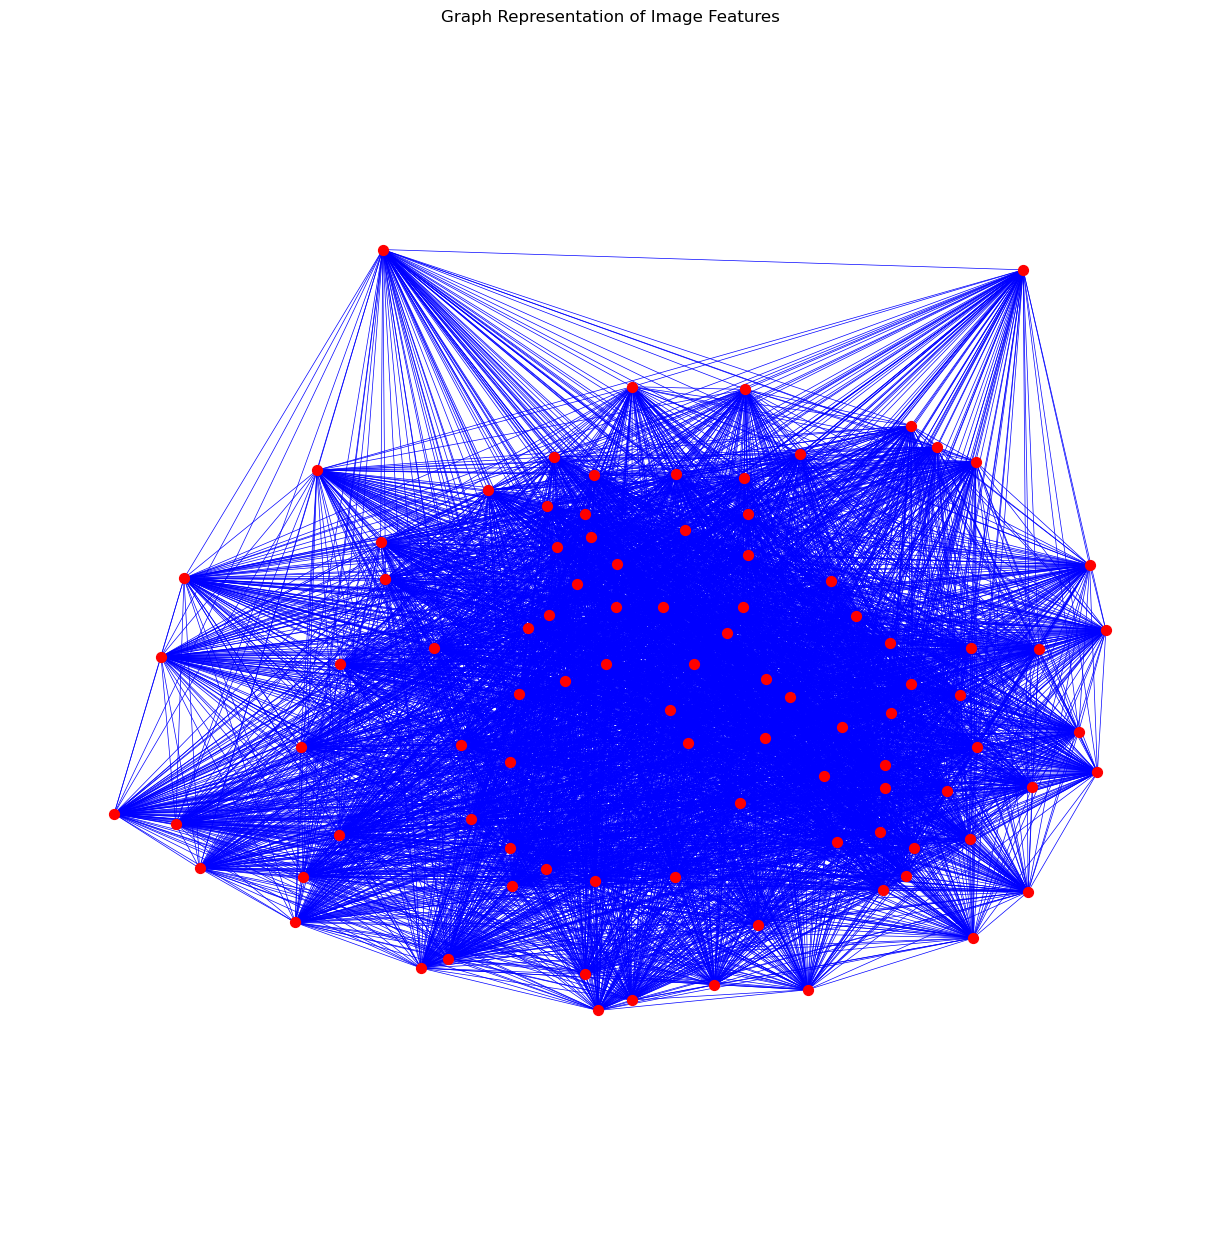

In [51]:
import numpy as np
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
import cv2

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def extract_features(image):
    # Harris köşe algılama
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    
    # Eşikleme
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    
    # Bağlantı bileşenleri analizi
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    
    return centroids

def image_to_graph(image_path):
    # Resmi yükle ve gri tonlamalıya çevir
    image = Image.open(image_path).convert('L')
    image_data = np.array(image)
    
    # Resmi 224x224 boyutuna getir
    image_data = resize_image(image_data, size=(224, 224))
    
    # Özellik çıkarma (Harris köşe algılama)
    features = extract_features(image_data)
    
    # Grafik veri yapısını oluştur
    G = nx.Graph()
    
    # Düğüm ekle
    for i, (x, y) in enumerate(features):
        G.add_node(i, pos=(x, y))
    
    # Kenar ekle (Euclidean mesafe ile komşular)
    for i, (x1, y1) in enumerate(features):
        for j, (x2, y2) in enumerate(features):
            if i != j:
                dist = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                G.add_edge(i, j, weight=dist)
    
    return G

def plot_graph(G):
    # Grafiği görselleştir
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_size=50, node_color='red', with_labels=False, width=0.5, edge_color='blue')
    plt.title("Graph Representation of Image Features")
    plt.axis('equal')
    plt.show()

# Örnek kullanım
image_path = 'Desktop/images2grah/cancer_6.jpg'  # Buraya resim dosya yolunu girin
G = image_to_graph(image_path)
plot_graph(G)


In [32]:
pip install opencv-python-headless==4.5.3.56 opencv-contrib-python-headless==4.5.3.56


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 2.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 MB 2.9 MB/s eta 0:00:0000:0100:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for opencv-python-headless (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [3058 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------------
      -------
      --
      CMake Error: CMake was unable to find a build program correspond

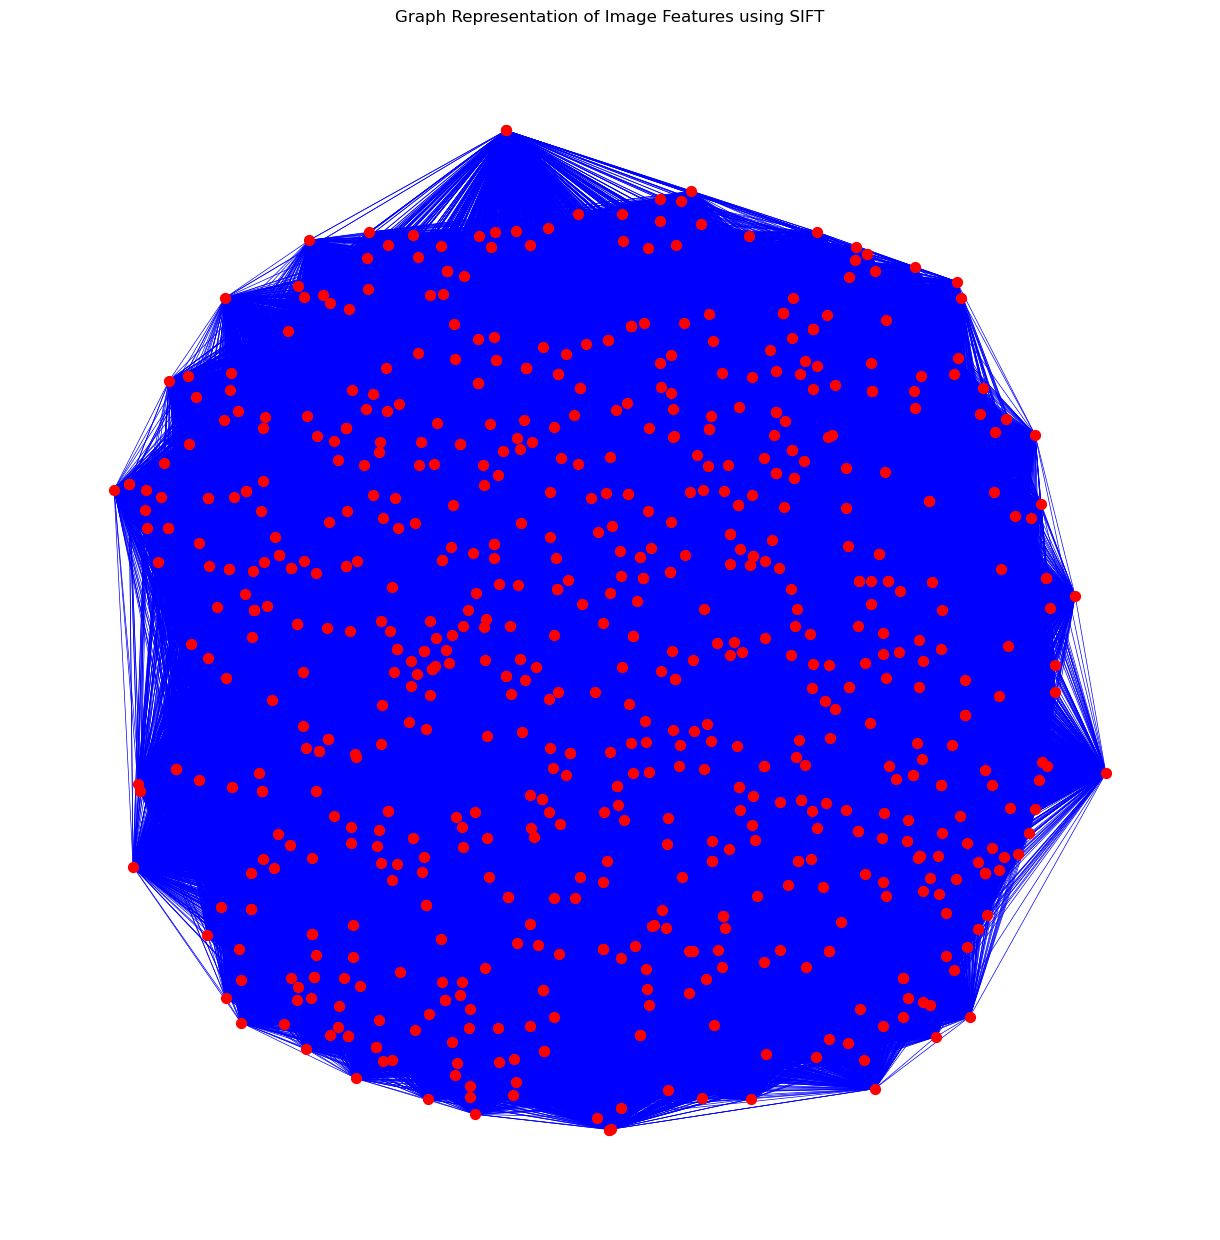

In [45]:
import numpy as np
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
import cv2

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def extract_features(image):
    # SIFT özelliği çıkarma
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

def image_to_graph(image_path):
    # Resmi yükle ve gri tonlamalıya çevir
    image = Image.open(image_path).convert('L')
    image_data = np.array(image)
    
    # Resmi 224x224 boyutuna getir
    image_data = resize_image(image_data, size=(224, 224))
    
    # Özellik çıkarma (SIFT)
    keypoints, descriptors = extract_features(image_data)
    
    # Grafik veri yapısını oluştur
    G = nx.Graph()
    
    # Düğüm ekle
    for i, kp in enumerate(keypoints):
        G.add_node(i, pos=(kp.pt[0], kp.pt[1]), descriptor=descriptors[i])
    
    # Kenar ekle (Euclidean mesafe ile komşular)
    for i in range(len(keypoints)):
        for j in range(i + 1, len(keypoints)):
            kp1 = keypoints[i]
            kp2 = keypoints[j]
            dist = np.sqrt((kp2.pt[0] - kp1.pt[0]) ** 2 + (kp2.pt[1] - kp1.pt[1]) ** 2)
            G.add_edge(i, j, weight=dist)
    
    return G

def plot_graph(G):
    # Grafiği görselleştir
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_size=50, node_color='red', with_labels=False, width=0.5, edge_color='blue')
    plt.title("Graph Representation of Image Features using SIFT")
    plt.axis('equal')
    plt.show()

# Örnek kullanım
image_path = 'Desktop/images2grah/cancer_1.jpg'  # Buraya resim dosya yolunu girin
G = image_to_graph(image_path)
plot_graph(G)


In [2]:
import os
import numpy as np
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
import cv2

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def extract_features(image):
    # Harris köşe algılama
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    
    # Eşikleme
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    
    # Bağlantı bileşenleri analizi
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    
    return centroids

def image_to_graph(image_path):
    # Resmi yükle ve gri tonlamalıya çevir
    image = Image.open(image_path).convert('L')
    image_data = np.array(image)
    
    # Resmi 224x224 boyutuna getir
    image_data = resize_image(image_data, size=(224, 224))
    
    # Özellik çıkarma (Harris köşe algılama)
    features = extract_features(image_data)
    
    # Grafik veri yapısını oluştur
    G = nx.Graph()
    
    # Düğüm ekle
    for i, (x, y) in enumerate(features):
        G.add_node(i, pos=(x, y))
    
    # Kenar ekle (Euclidean mesafe ile komşular)
    for i, (x1, y1) in enumerate(features):
        for j, (x2, y2) in enumerate(features):
            if i != j:
                dist = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                G.add_edge(i, j, weight=dist)
    
    return G

def plot_graph(G, output_path):
    # Grafiği görselleştir
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_size=50, node_color='red', with_labels=False, width=0.5, edge_color='blue')
    plt.title("Graph Representation of Image Features")
    plt.axis('equal')
    plt.savefig(output_path)
    plt.close()

def process_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(input_dir):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_dir, filename)
            G = image_to_graph(image_path)
            output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_graph.png")
            plot_graph(G, output_path)

# Örnek kullanım
input_dir = 'Downloads/PrepDataset/4'  # Resimlerin bulunduğu dizin
output_dir = 'Desktop/images2grah/Image2Graph_PrepDataset/4'  # Grafiklerin kaydedileceği dizin
process_images(input_dir, output_dir)


In [63]:
import os
import numpy as np
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
import cv2

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def extract_features(image):
    # Harris köşe algılama
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    
    # Eşikleme
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    
    # Bağlantı bileşenleri analizi
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    
    return centroids

def image_to_graph(image_path):
    # Resmi yükle ve gri tonlamalıya çevir
    image = Image.open(image_path).convert('L')
    image_data = np.array(image)
    
    # Resmi 224x224 boyutuna getir
    image_data = resize_image(image_data, size=(224, 224))
    
    # Özellik çıkarma (Harris köşe algılama)
    features = extract_features(image_data)
    
    # Grafik veri yapısını oluştur
    G = nx.Graph()
    
    # Düğüm ekle
    for i, (x, y) in enumerate(features):
        G.add_node(i, pos=(x, y))
    
    # Kenar ekle (Euclidean mesafe ile komşular)
    for i, (x1, y1) in enumerate(features):
        for j, (x2, y2) in enumerate(features):
            if i != j:
                dist = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                G.add_edge(i, j, weight=dist)
    
    return G

def plot_graph(G, output_path):
    # Grafiği görselleştir
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_size=50, node_color='red', with_labels=False, width=0.5, edge_color='blue')
    plt.title("Graph Representation of Image Features")
    plt.axis('equal')
    plt.savefig(output_path)
    plt.close()

def process_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(input_dir):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_dir, filename)
            G = image_to_graph(image_path)
            output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_test_graph.png")
            plot_graph(G, output_path)

# Örnek kullanım
input_dir = 'Desktop/MASAÜSTÜ_DOSYALARI/Pancreatic_CT_Images/test/test/normal'  # Resimlerin bulunduğu dizin
output_dir = 'Desktop/images2grah/pankreas_all/normal'  # Grafiklerin kaydedileceği dizin
process_images(input_dir, output_dir)


In [64]:
pip install pandas networkx matplotlib


Note: you may need to restart the kernel to use updated packages.
